<a href="https://colab.research.google.com/github/demonKing369/ml-practice-projects/blob/medical-loan-prediction/ml_leanring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 downloading dta

In [ ]:
#downloading dta
medical_dataset_url = "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
from urllib.request import urlretrieve
urlretrieve(medical_dataset_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x786f41735060>)

In [ ]:
import pandas as pd
medical_csv = pd.read_csv('medical.csv')


In [ ]:
medical_csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_csv.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


visulaization

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

seaorn settigs

In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_csv.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_csv, x="age", marginal = "box",nbins = 47, title="Age Distribution")
fig.update_layout(bargap=0.1)
fig.show()

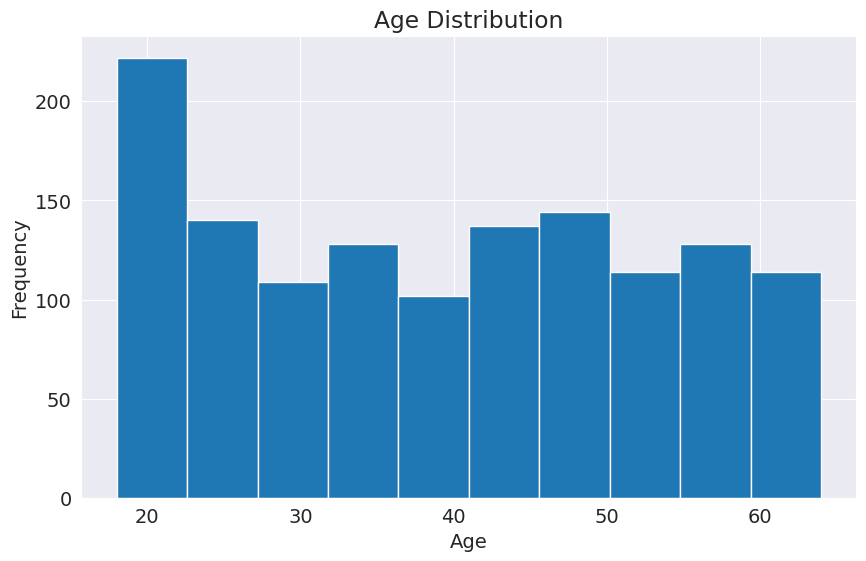

In [ ]:
  plt.hist(medical_csv.age)
  plt.title("Age Distribution")
  plt.xlabel("Age")
  plt.ylabel("Frequency")
  plt.show()

In [ ]:
medical_csv.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
fig = px.histogram(medical_csv, x="bmi", marginal = "box" , title="distrubution of bmi" ,color_discrete_sequence= ["red"])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_csv.charges.describe()
medical_csv.charges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [ ]:
fig= px.histogram(medical_csv, x="charges", marginal = "box", color = 'smoker' ,color_discrete_sequence =["black"," red"],title="distrubution of charges")
fig.update_layout(bargap=0.1)
fig.show()
#

In [ ]:
medical_csv.sex.describe()


count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [ ]:
fig= px.histogram(medical_csv, x="sex", marginal = "box", color = 'region' ,color_discrete_sequence =["green"," black"],title="distrubution of sex")
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig= px.histogram(medical_csv, x="smoker", color="sex", title="distribution of smoker")
fig.show()

In [ ]:
fig = px.histogram(medical_csv, x="sex", marginal = "box", color ='children',title="distrubution of region")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(medical_csv, x="age", y="charges", color ='smoker',opacity=0.8, hover_data=["sex"],title="distrubution of region")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(medical_csv, x="bmi", y="charges", color ='smoker',opacity=0.8, hover_data=["sex"],title="distrubution of region")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(medical_csv,x='children',y='charges')

# ***correlation***



In [ ]:
df=medical_csv

In [ ]:
df.charges.corr(df.age)

0.2990081933306476

In [ ]:
df.charges.corr(df.bmi)

0.19834096883362895

In [ ]:
df.charges.corr(df.children)

0.06799822684790478

**we can't use string to correlation so we convert string to numeric value**

In [ ]:
smoker_values={'yes':1,'no':0}
smoker_numeric=medical_csv.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
df=medical_csv
df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
df.select_dtypes(include=["number"]).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'corr mateix')

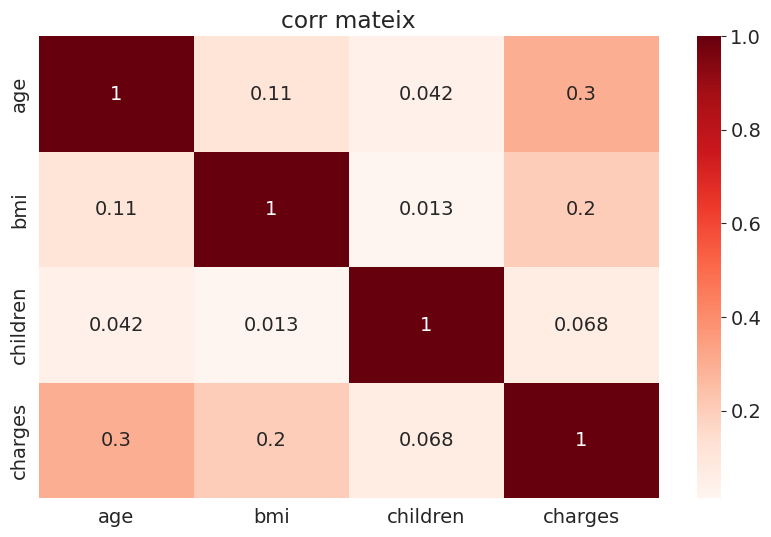

In [ ]:
sns.heatmap(medical_csv.select_dtypes(include=['number']).corr(),cmap="Reds",annot=True)
plt.title("corr mateix")

In [ ]:
pip install jovian

In [ ]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


# LINEAR REGRESSON

In [ ]:
NON_SMOKER_DF = medical_csv[medical_csv.smoker == 'no']
NON_SMOKER_DF

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: xlabel='age', ylabel='charges'>

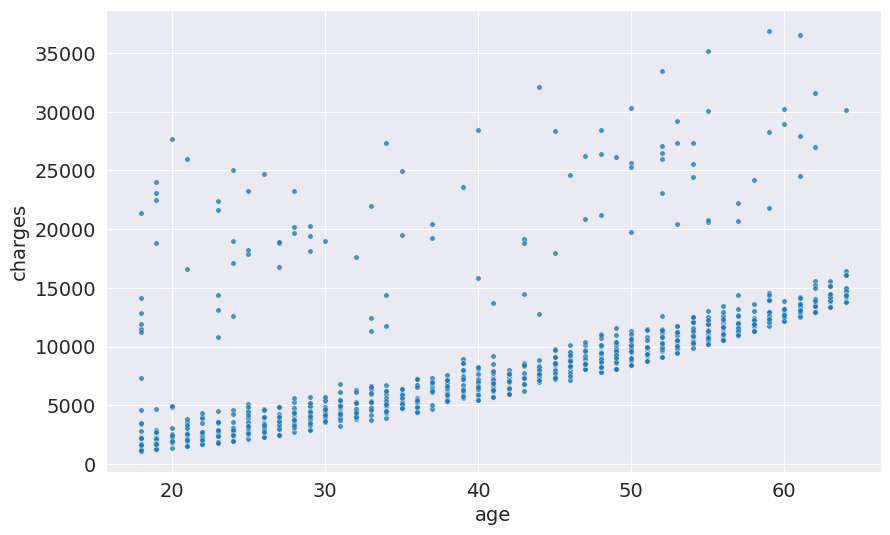

In [ ]:
sns.scatterplot(data=NON_SMOKER_DF, x='age', y='charges', alpha =0.8,s=15 )

In [ ]:
def estimate_charges(age,w,b):
  return (w * age) + b

In [ ]:
w= 50
b = 100


In [ ]:
ages = NON_SMOKER_DF.age
estimated_charges= estimate_charges(ages,w,b)

Text(0, 0.5, 'charges')

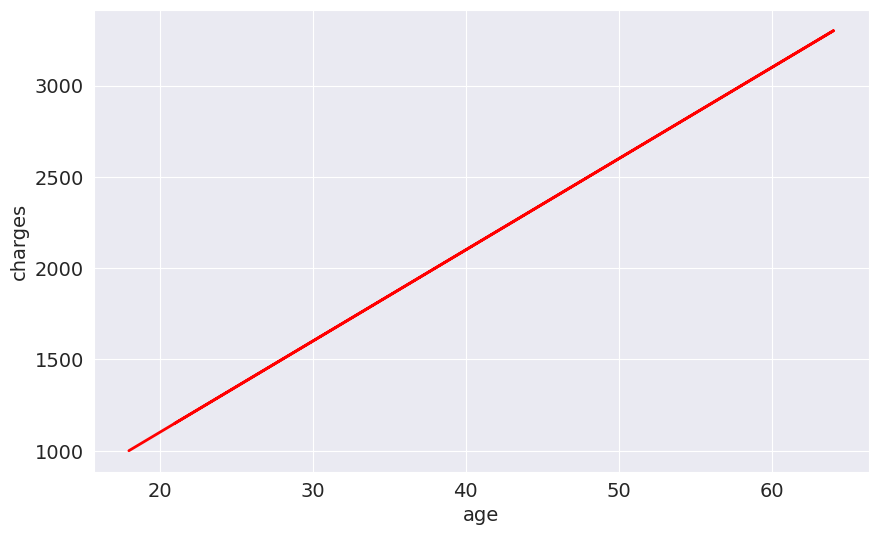

In [ ]:
plt.plot(ages,estimated_charges,color='red',linewidth=2)
plt.xlabel("age")
plt.ylabel("charges")


In [ ]:
estimate_charges(ages,w,b)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
NON_SMOKER_DF.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

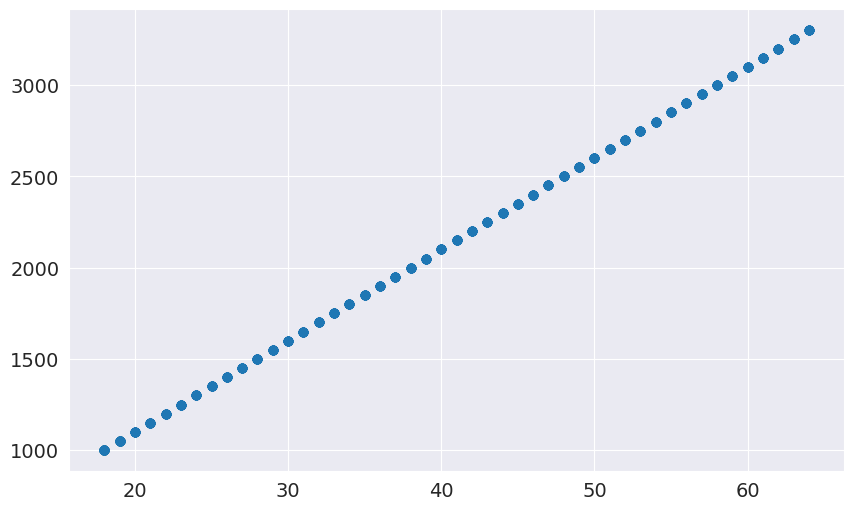

In [ ]:
plt.scatter(ages,estimated_charges)

Text(0, 0.5, 'charges')

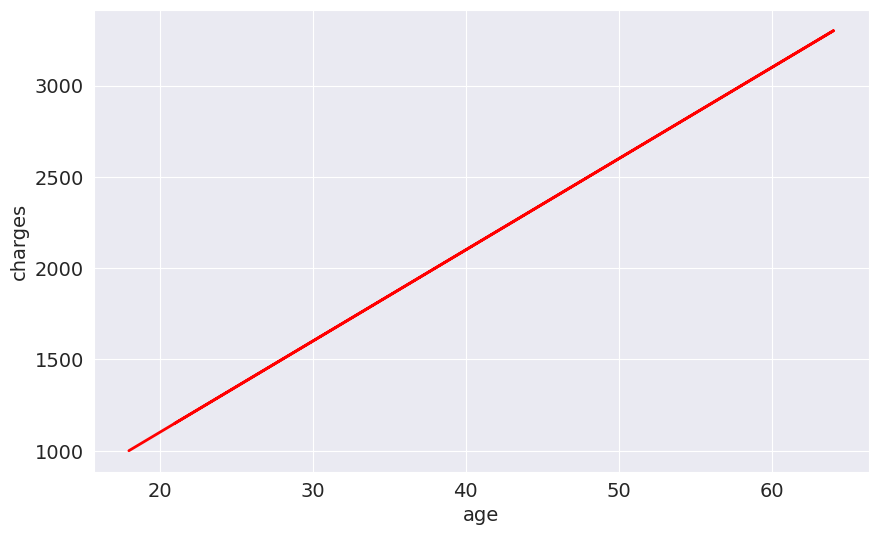

In [ ]:
plt.plot(ages,estimated_charges,'r-',linewidth=2)
plt.xlabel("age")
plt.ylabel("charges")


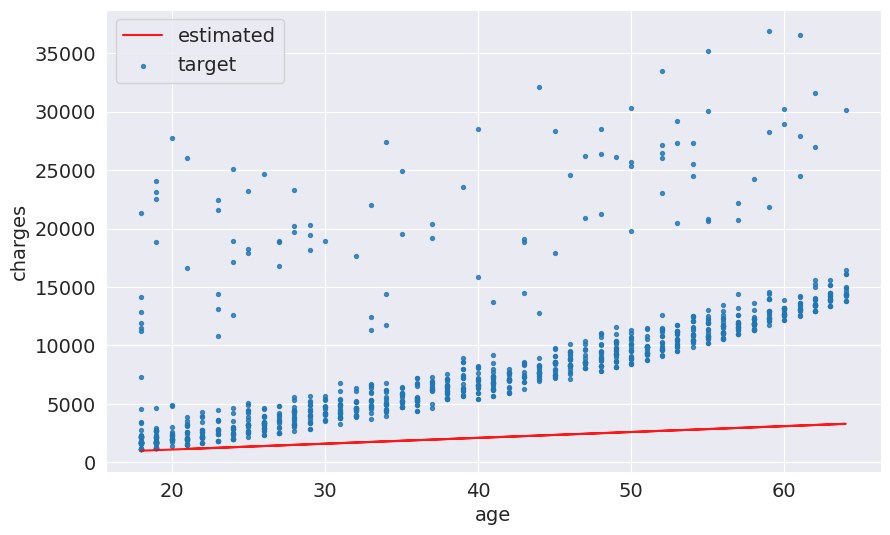

In [ ]:
target=NON_SMOKER_DF.charges

plt.plot(ages,estimated_charges,"r",alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel("age")
plt.ylabel("charges")
plt.legend(["estimated","target"])


In [ ]:
def try_parameter(w,b):
  ages=NON_SMOKER_DF.age
  target=NON_SMOKER_DF.charges
  estimated_charges= estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges,"r",alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel("age")
  plt.ylabel("charges")
  plt.legend(["estimated","target"])

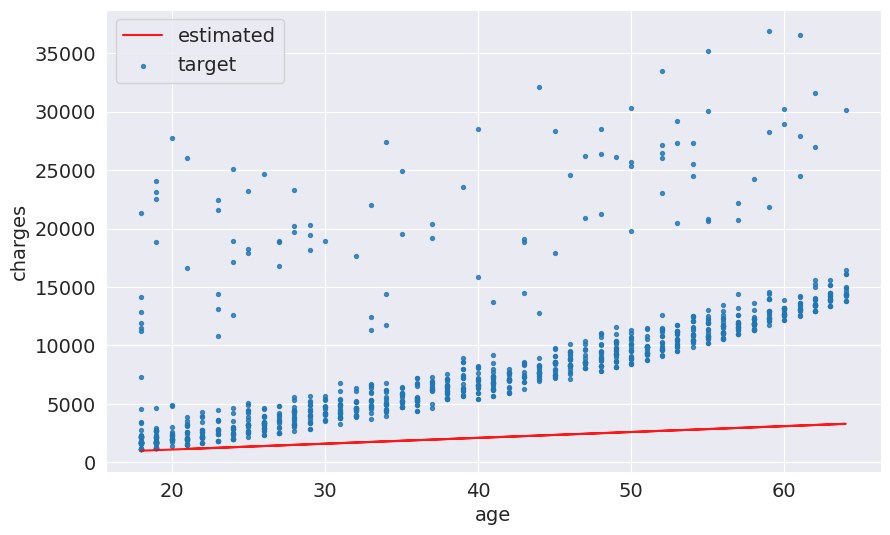

In [ ]:
# prompt: write code for some random value for w and b  in try parmeter

try_parameter(50,100)


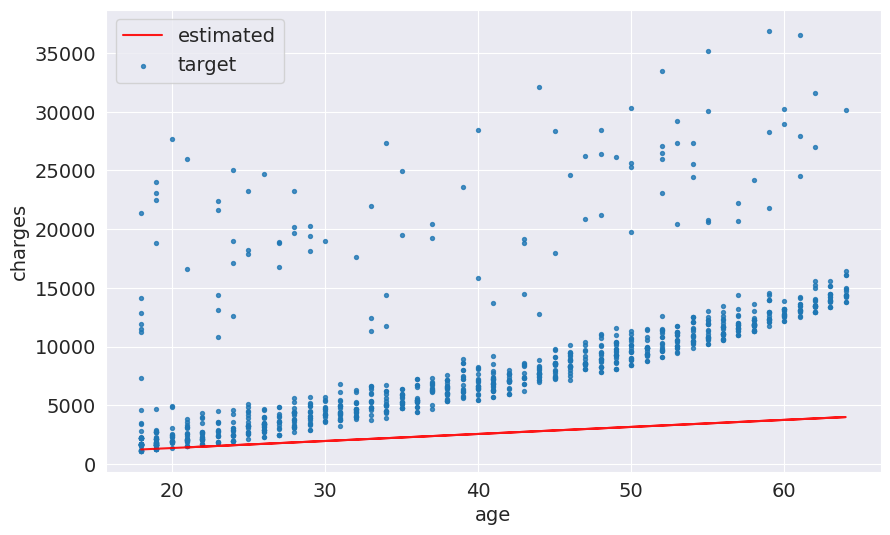

In [ ]:
try_parameter(60,150)

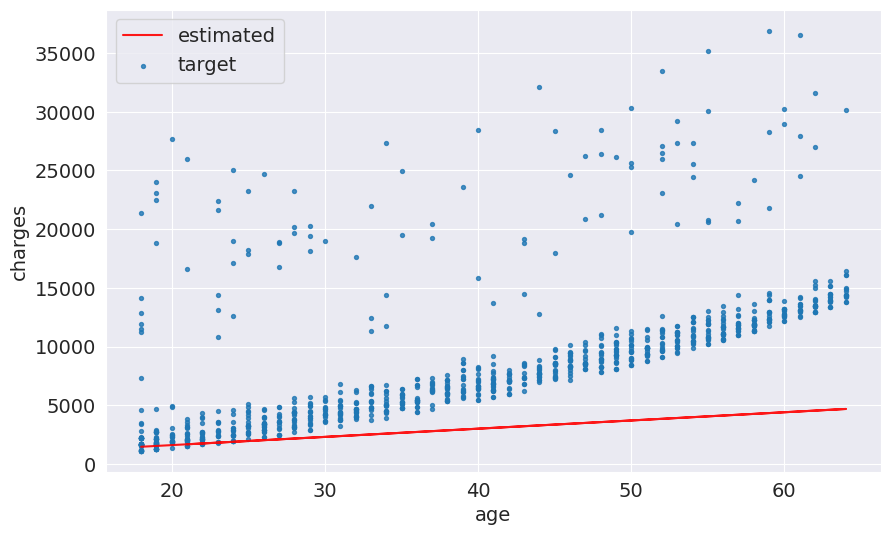

In [ ]:
try_parameter(70,200)

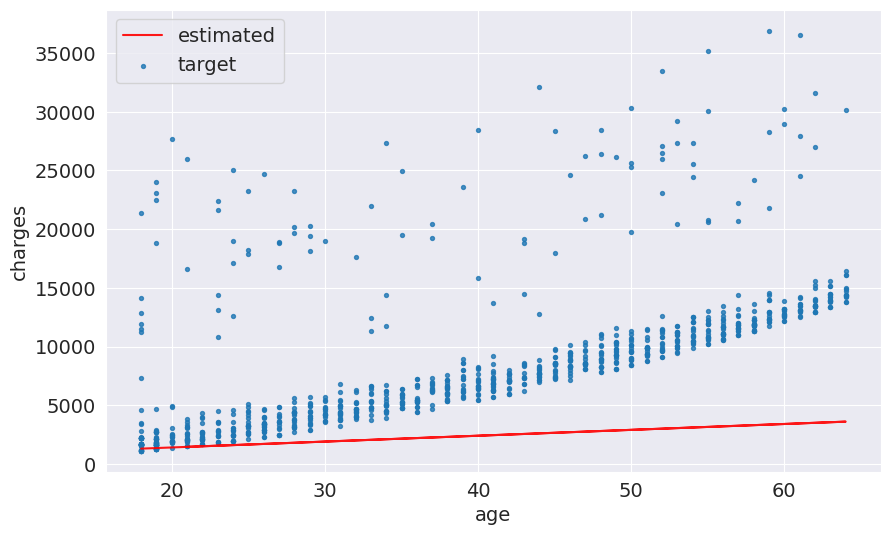

In [ ]:
try_parameter(50,400)

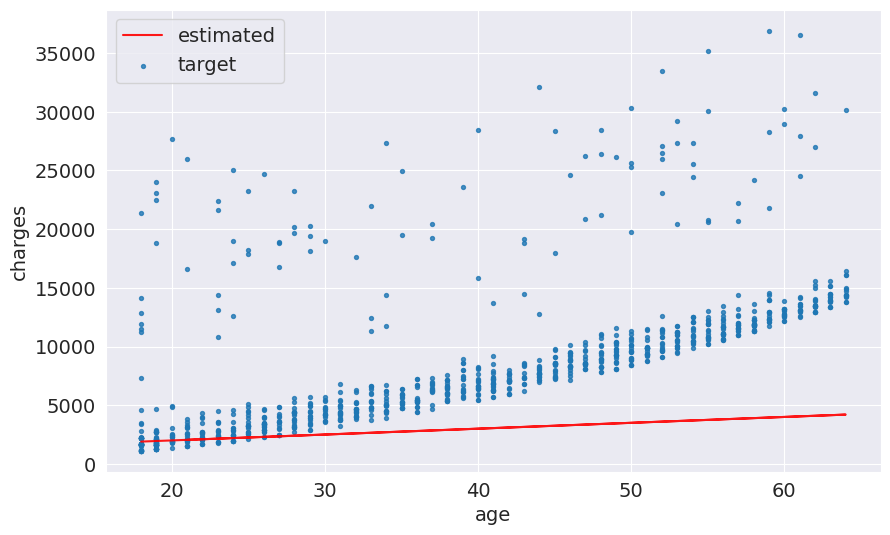

In [ ]:
try_parameter(50,1000)

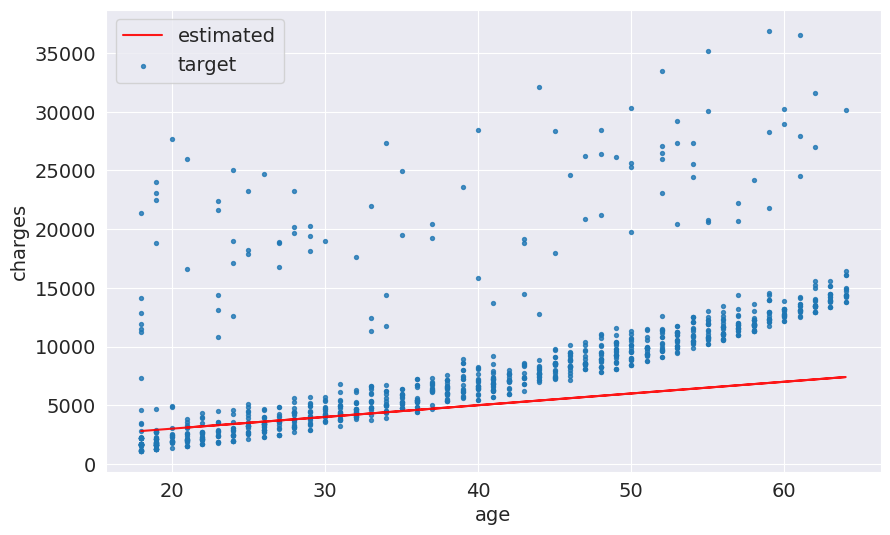

In [ ]:
try_parameter(100,1000)

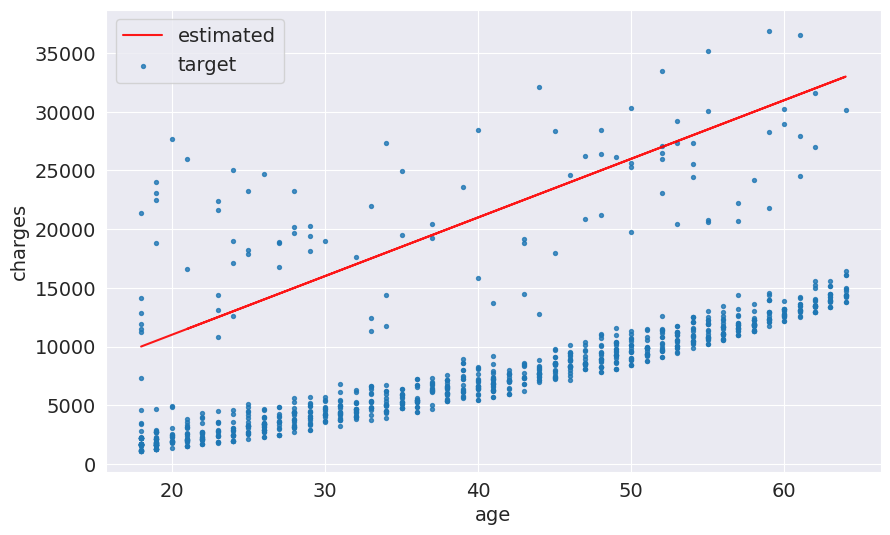

In [ ]:
try_parameter(500,1000)

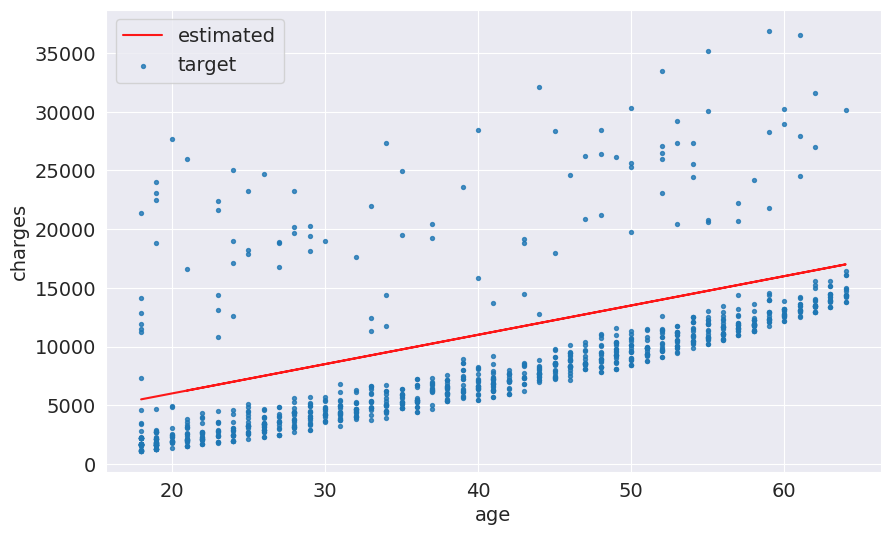

In [ ]:
try_parameter(250,1000)

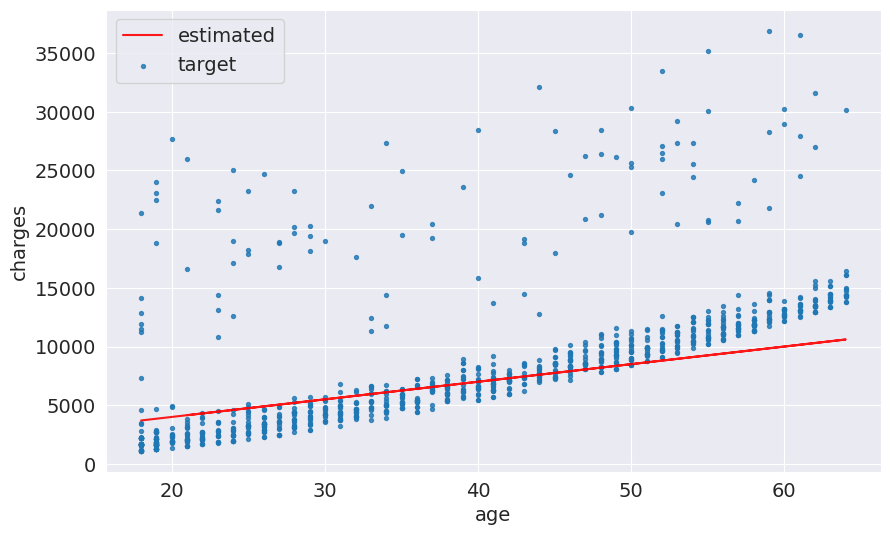

In [ ]:
try_parameter(150,1000)

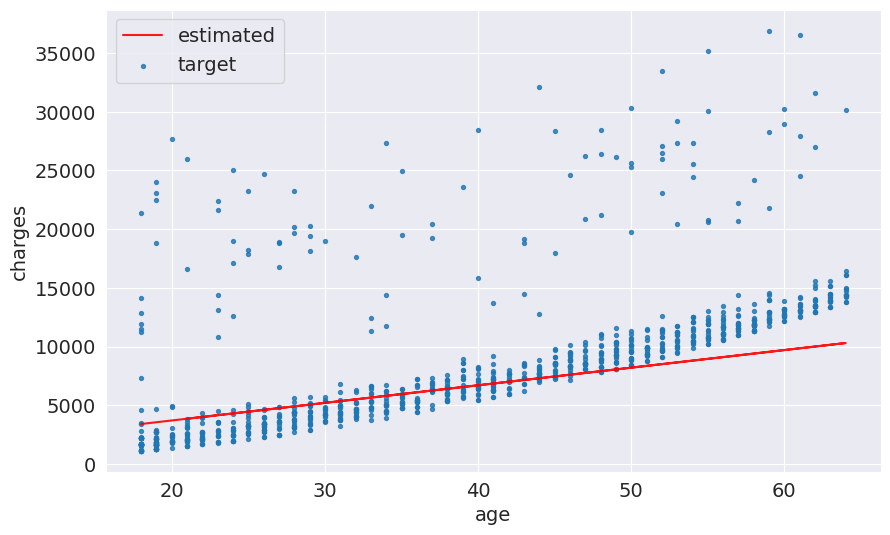

In [ ]:
try_parameter(150,700)

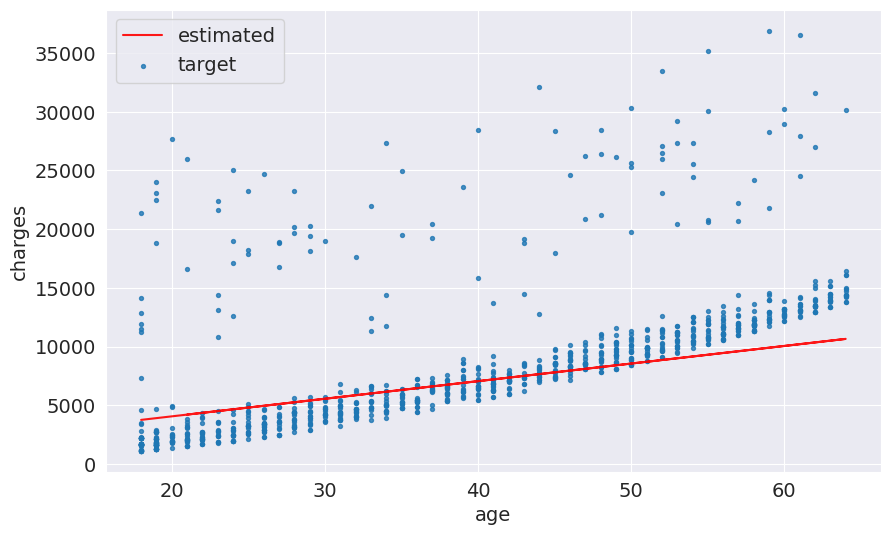

In [ ]:
try_parameter(150,1050)

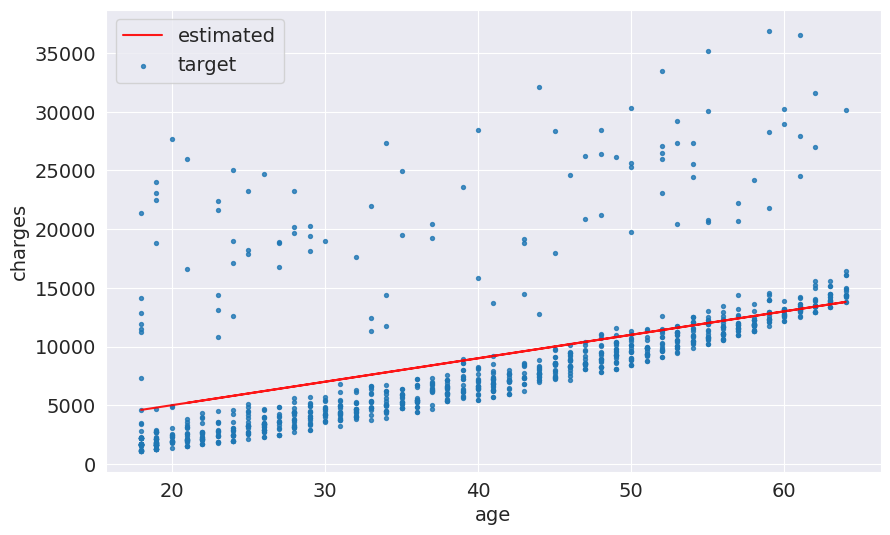

In [ ]:
try_parameter(200,1000)

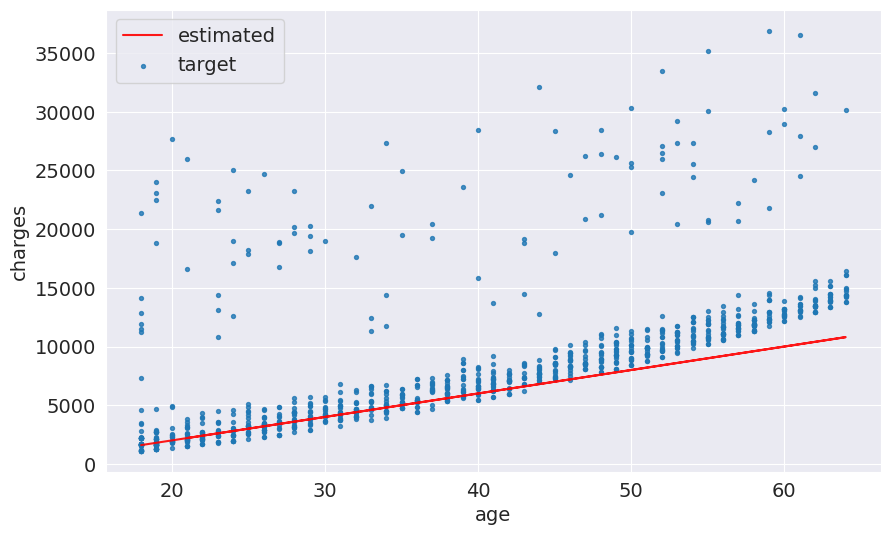

In [ ]:
try_parameter(200,-2000)

# **lost cost fuction**

In [ ]:
predicted = estimate_charges(ages,w=220,b=-2000)
target = NON_SMOKER_DF.charges
N=len(target)
corection = (predicted - target)**2
squared_corection = corection.mean()
RMSE = (squared_corection)**0.5
print(f"RMSE: {RMSE}")

RMSE: 5031.147374597698


In [ ]:
import numpy as np
def rmse(target,predicted):
  return np.sqrt(np.mean(np.square(target-predicted)))


In [ ]:
predicted = estimate_charges(ages,w=200,b=-2000)
target = NON_SMOKER_DF.charges
rmse(target,predicted)

5401.33123544369

In [ ]:
def try_parameter1(w,b):
  predicted = estimate_charges(ages,w,b)
  target = NON_SMOKER_DF.charges
  loss=rmse(target,predicted)
  print(f"RMSE: {loss}")



  plt.plot(ages,predicted)
  plt.scatter(ages,target,color="red")


RMSE: 5401.33123544369


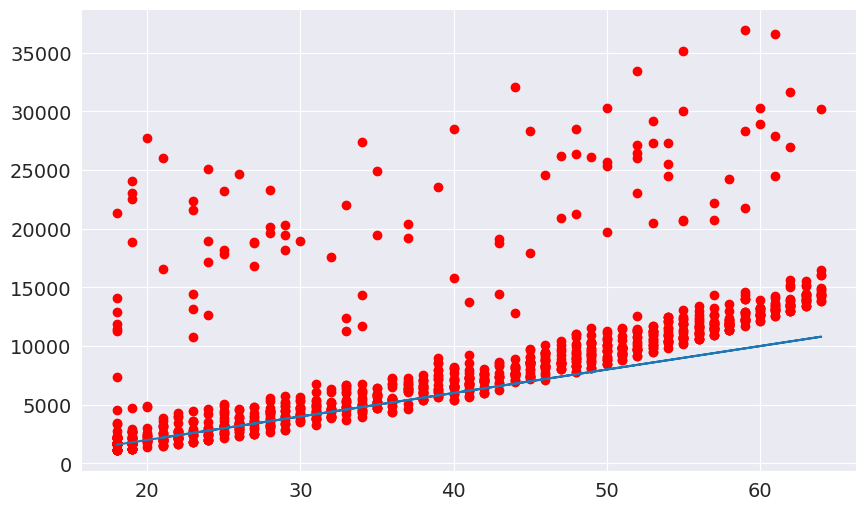

In [ ]:
try_parameter1(200,-2000)

RMSE: 4884.627957453161


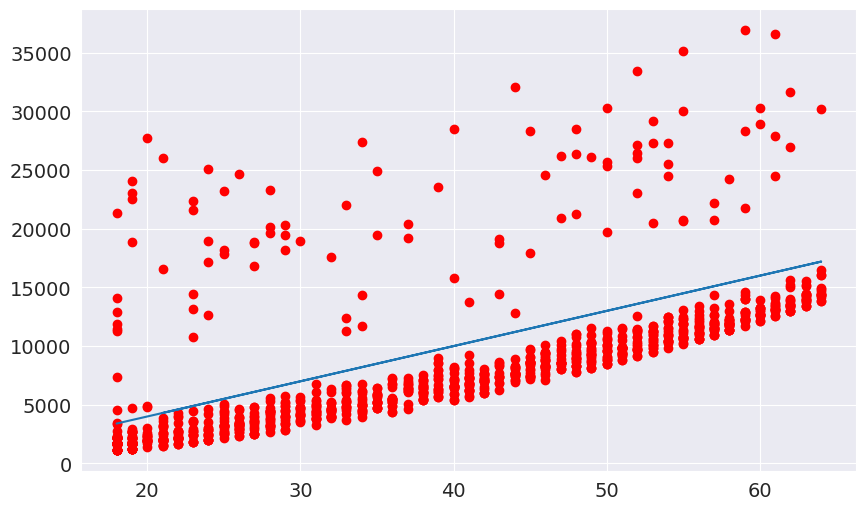

In [ ]:
try_parameter1(300,-2000)

RMSE: 7316.557899422324


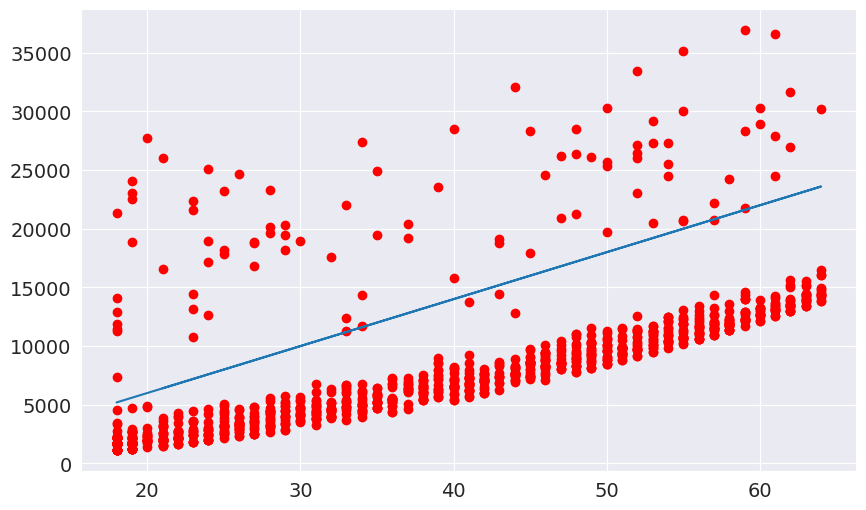

In [ ]:
try_parameter1(400,-2000)

RMSE: 5255.688032459636


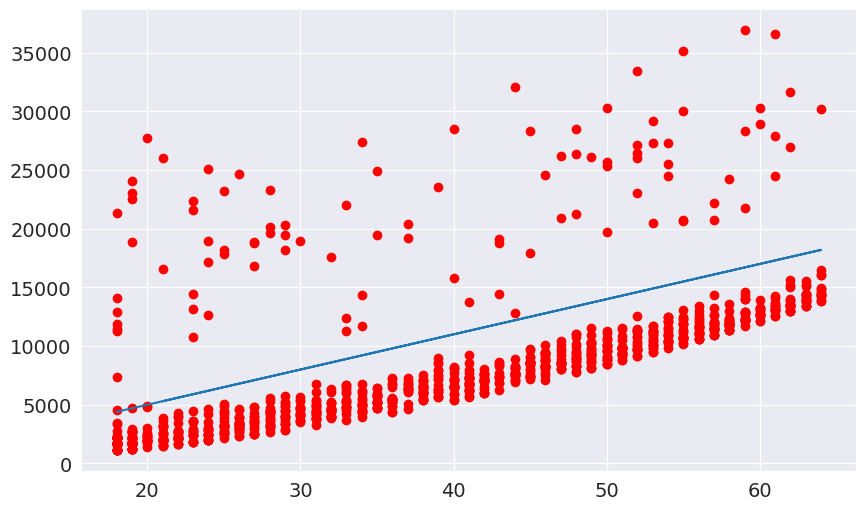

In [ ]:
try_parameter1(300,-1000)

RMSE: 5940.43604227385


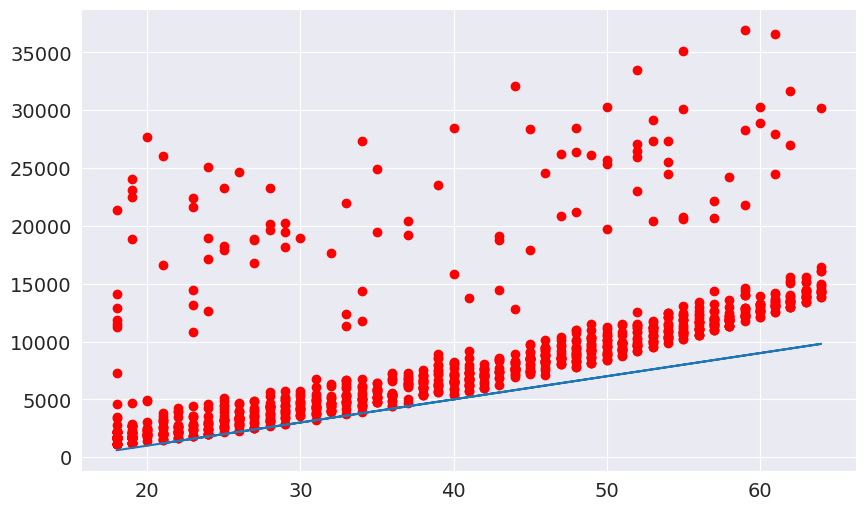

In [ ]:
try_parameter1(200,-3000)

RMSE: 4700.736524304107


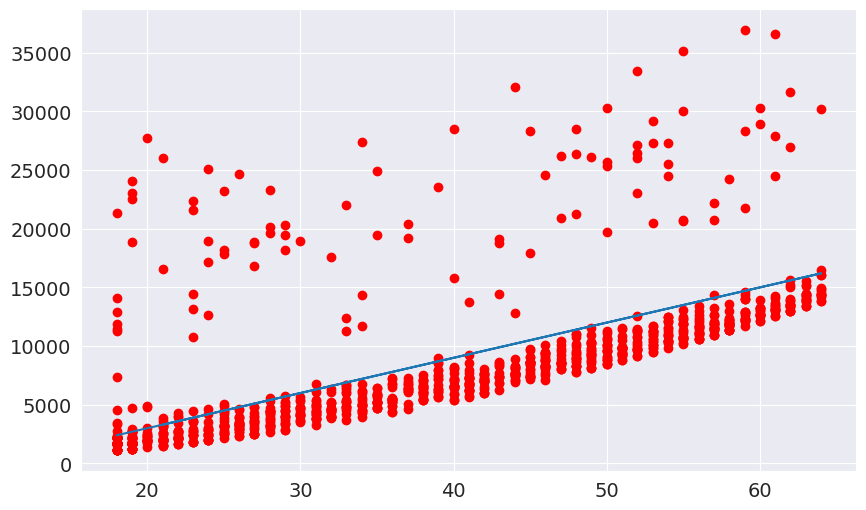

In [ ]:
try_parameter1(300,-3000)

RMSE: 4725.9133994520325


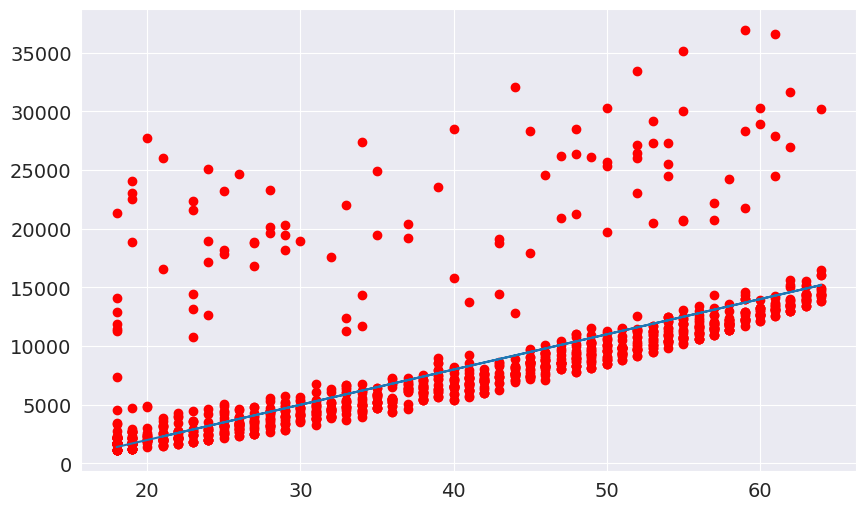

In [ ]:
try_parameter1(300,-4000)

RMSE: 4991.993804156943


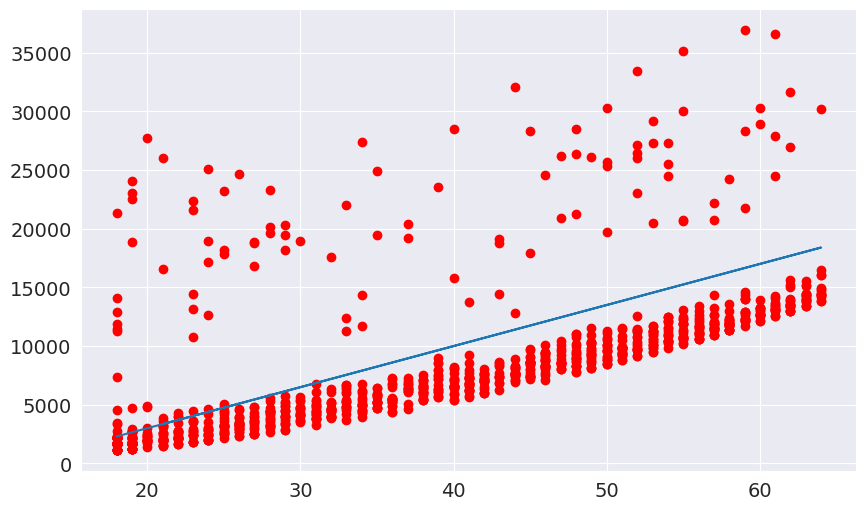

In [ ]:
try_parameter1(350,-4000)

RMSE: 4688.751495714544


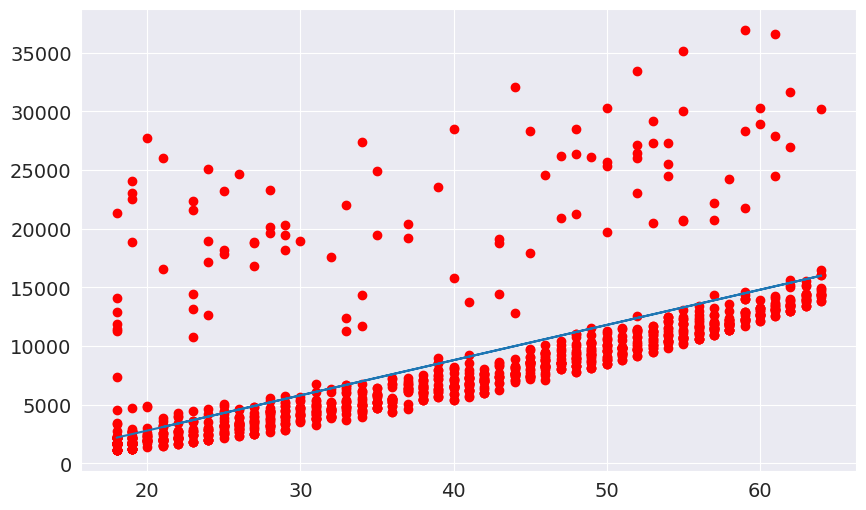

In [ ]:
try_parameter1(300,-3200)

# linear regression using scikit learn

In [ ]:
pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
inputs=NON_SMOKER_DF[["age"]] # double set procket is used to two dumentional array
target = NON_SMOKER_DF.charges
print(inputs.shape ,"\n", target.shape )


(1064, 1) 
 (1064,)


In [ ]:
model.fit(inputs,target)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
 [34],
 [45],
 [56],
 [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  6995.0424797 ,  9934.78052084, 12874.51856198,
       14210.76312614])

In [ ]:
prediction = model.predict(inputs)
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
target


1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
rmse(target,prediction)

4662.505766636395

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

RMSE: 4662.505766636395


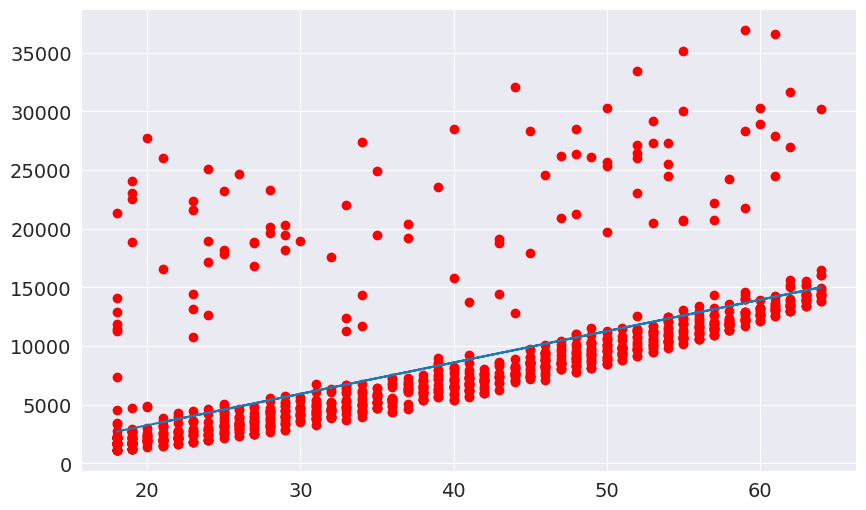

In [ ]:
try_parameter1(model.coef_,model.intercept_)

In [ ]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(max_iter=1000)
model.fit(inputs,target)

SGDRegressor()

In [ ]:
model.predict(np.array([[23],
 [34],
 [45],
 [56],
 [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([-1.14661990e+08, -1.55741821e+06,  1.11547154e+08,  2.24651726e+08,
        2.76062895e+08])

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [ ]:
model.coef_

array([10282233.81920478])

In [ ]:
model.intercept_

array([-3.51153368e+08])

In [ ]:
prediction = model.predict(inputs)
prediction


array([-1.66073159e+08, -6.32508211e+07, -1.18396520e+07, ...,
       -1.66073159e+08, -1.66073159e+08, -1.35226458e+08])

In [ ]:
target = NON_SMOKER_DF.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
rmse(target,prediction)

154415241.42736477

RMSE: 154415241.42736477


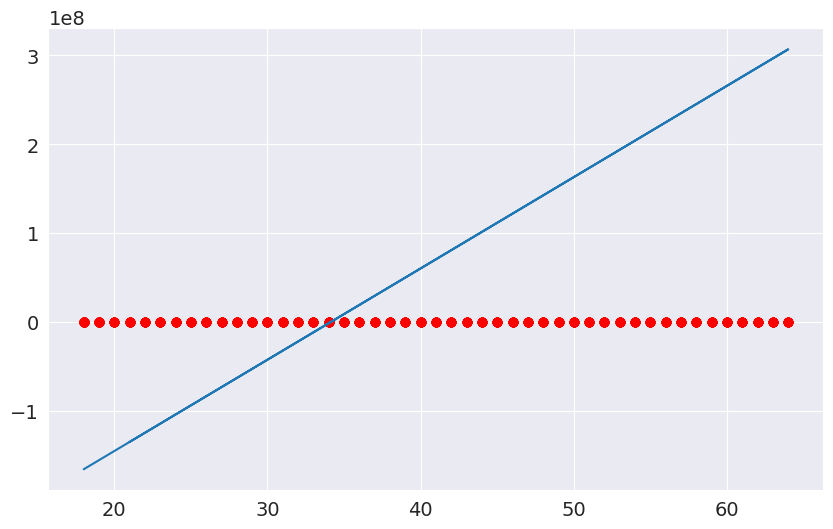

In [ ]:
try_parameter1(model.coef_,model.intercept_)

# linear regression for smokers

In [ ]:
SMOKER=medical_csv[medical_csv.smoker=='yes']
SMOKER

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
model=LinearRegression()

In [ ]:
inputs=SMOKER[["age"]]
target=SMOKER.charges
print(inputs.shape,"\n",target.shape)

(274, 1) 
 (274,)


In [ ]:
model.fit(inputs,target)

LinearRegression()

In [ ]:
model.predict(np.array([[20],[60]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([26398.88016911, 38608.38425351])

In [ ]:
prediction=model.predict(inputs)
prediction

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:
target

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [ ]:
rmse(target,prediction)

10711.00334810241

In [ ]:
model.coef_

array([305.23760211])

In [ ]:
model.intercept_

20294.128126915966

RMSE: 5363.494785175618


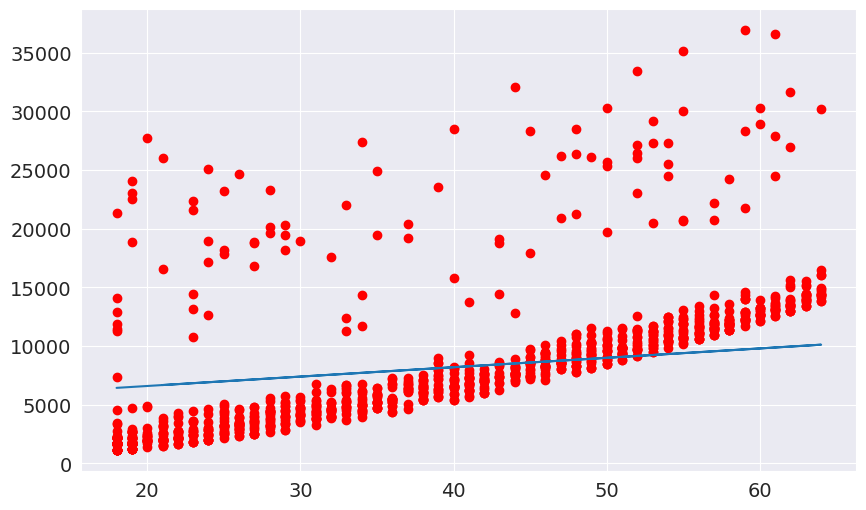

In [ ]:
try_parameter1(80,5000)

In [ ]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(max_iter=1000)
model.fit(inputs,target)

SGDRegressor()

In [ ]:
model.predict(np.array([[20],[60]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([2.83548429e+09, 2.05144104e+10])

# linear regression  with multple features

In [ ]:
inputs , targets = NON_SMOKER_DF[["age","bmi"]],NON_SMOKER_DF.charges
model = LinearRegression().fit(inputs,targets)

# covert categoricl to numerical data for binary code method

In [ ]:
medical_csv



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
smoke_code={'yes':1,'no':0}
medical_csv['smoke_code']=medical_csv.smoker.map(smoke_code)
medical_csv

,age,sex,bmi,children,smoker,region,charges,smoke_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
inputs, targets = medical_csv[["age","bmi","children","smoke_code"]],medical_csv.charges
model = LinearRegression().fit(inputs,targets)

In [ ]:
prediction = model.predict(inputs)
prediction


array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541])

In [ ]:
rmse(targets,prediction)

6056.439217188081

In [ ]:
sex_code={'male':1,'female':0}
medical_csv['sex_code']=medical_csv.sex.map(sex_code)
medical_csv

,age,sex,bmi,children,smoker,region,charges,smoke_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_csv.charges.corr(medical_csv.sex_code)

0.057292062202025484

In [ ]:
input,target = medical_csv[["age","bmi","children","smoke_code","sex_code"]],medical_csv.charges
model = LinearRegression().fit(input,target)

In [ ]:
prediction=model.predict(input)
prediction

array([25661.85689486,  3818.77858262,  7096.73025538, ...,
        4465.88909619,  1676.96948913, 36863.89250792])

In [ ]:
rmse(target,prediction)

6056.100708754546

## one hot encoding

In [ ]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_csv[["region"]])
enc.categories_


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot =enc.transform(medical_csv[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_csv[["northeast","northwest","southeast","southwest"]]=one_hot
medical_csv

,age,sex,bmi,children,smoker,region,charges,smoke_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
inp,tar=medical_csv[["age","bmi","children","smoke_code","sex_code","northeast","northwest","southeast","southwest"]],medical_csv.charges
model=LinearRegression().fit(inp,tar)
prediction=model.predict(inp)
prediction

rmse(tar,prediction)

6041.6796511744515

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


# model improvement

here we  calculate std mean etec.. for y the model pricte this much of value  bzc we cant blindly trust our model

In [ ]:
# find weight for the columns

model.coef_


array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

-12525.547811195444

In [ ]:
model_df=pd.DataFrame({"feature":np.append(["age","bmi","children","smoke_code","sex_code","northeast","northwest","southeast","southwest"],1),
                       "weights":np.append(model.coef_,model.intercept_)})
model_df

,feature,weights
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoke_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [ ]:
from sklearn.preprocessing import StandardScaler


numarical_cols=["age","bmi","children"]
scaler=StandardScaler()
scaler.fit(medical_csv[numarical_cols])


StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_


array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
medical_csv[numarical_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
scaled_inputs = scaler.transform(medical_csv[numarical_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols=["smoke_code","sex_code","northeast","northwest","southeast","southwest"]
cat_data=medical_csv[cat_cols].values

In [ ]:
inp[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [ ]:
inp,tar=np.concatenate((scaled_inputs,cat_data),axis=1),medical_csv.charges

In [ ]:
model=LinearRegression().fit(inp,tar)
pred=model.predict(inp)


In [ ]:
rmse(tar,pred)

6041.6796511744515

it not change the loss but it change the uneven weights. so its easily tell the feature of that much of pridiction

In [ ]:
weights_df=pd.DataFrame({"feature":np.append(numarical_cols+cat_cols,1),
                       "weights":np.append(model.coef_,model.intercept_)})
weights_df.sort_values("weights",ascending=False)


,feature,weights
3,smoke_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_customer = [[28,30,2,1,1,0,0,0,0.]]
model.predict(new_customer)

array([196369.69540657])

In [ ]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,1,0,0,0,0.]])

array([29510.45493871])

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## logistic regresion
